## First function

** The eventual objective of the function is to generate maps of annual precipitation averages, but before we get there I want to prepare a template for the maps and make sure that everything is working properly **

The function will be of the type:
```
def(year):
    for files in year_directory:
    calculate average values
    using matplotlib display map of average
    save map as year_average in new directory called averages
```

Every folder is named 1998, 1999, 2000, etc. so the function will call all files in the respective folder and calculate averages.
  
--    
    
This took a long time, but eventually the first map was produced! 

Data are included in the /data/2015 repo


/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


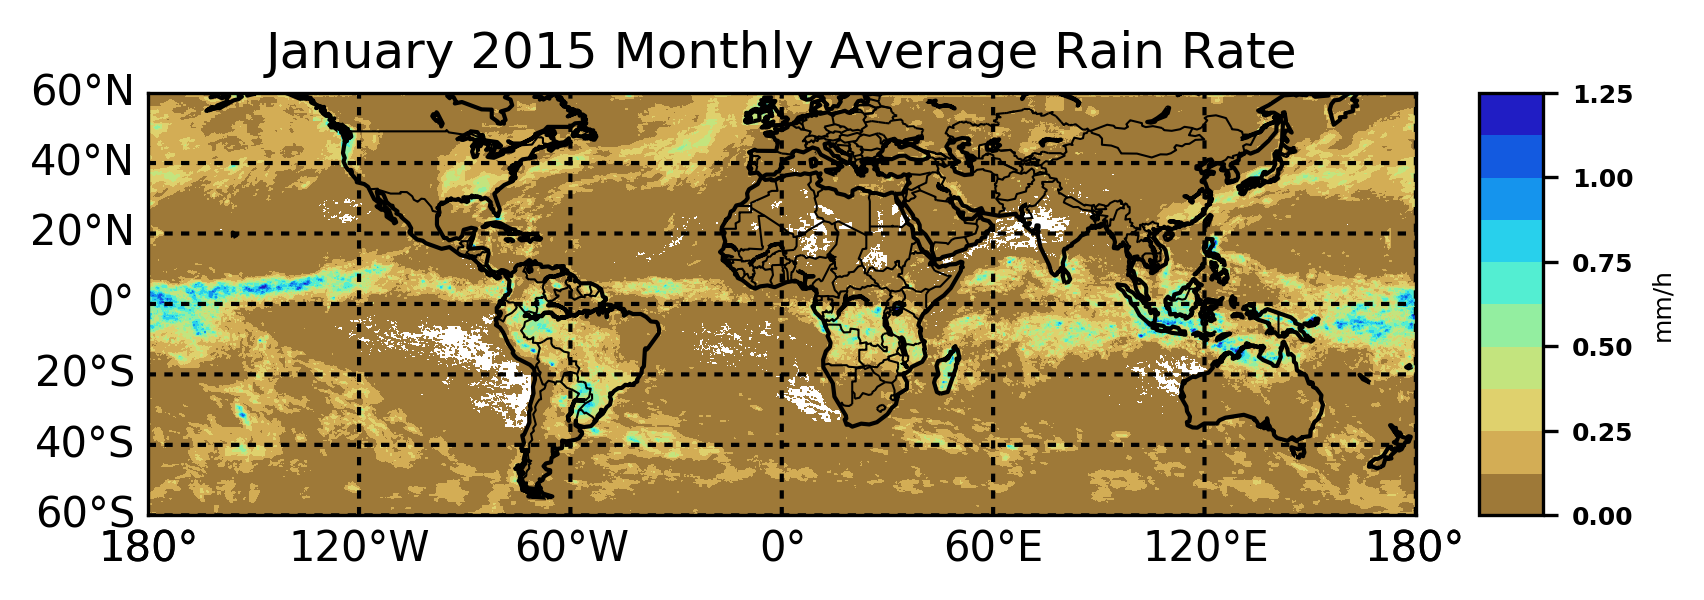

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
# import libraries and modules
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py as h5py

dataset = h5py.File('/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151201-S000000-E235959.12.V03D.HDF5', 'r') 

# Get precipitation data only
precip = dataset['Grid/precipitation'][:]
precip = np.transpose(precip)

# Get longitudes and latitudes
theLats = dataset['Grid/lat'][:]
theLons = dataset['Grid/lon'][:]

# Plot the figure, define the geographic bounds
fig = plt.figure(dpi=300)
latcorners = ([-60,60])
loncorners = ([-180,180])

m = Basemap(projection='cyl',llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

# Draw coastlinescountry boundaries, edge of map.
m.drawcoastlines()
# m.drawstates() # no need for states, but can use this in the future
m.drawcountries()

# Draw filled contours.
clevs = np.arange(0,1.26,0.125)

# Define the latitude and longitude data
x, y = np.float32(np.meshgrid(theLons, theLats))

# Mask the values less than 0 because there is no data to plot.
masked_array = np.ma.masked_where(precip < 0,precip) # this needed to be corrected - it was incorrectly typed in the data recipe!

# Plot every masked value as white
cmap = cm.GMT_drywet
cmap.set_bad('w',1.)

# Plot the data
cs = m.contourf(x,y,precip,clevs,cmap=cmap,latlon=True) # reports error due to deprecation but produces map correctly
parallels = np.arange(-60.,61,20.)
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(-180.,180.,60.)
m.drawmeridians(meridians,labels=[False,False,False,True])

#Set the title and fonts
plt.title('January 2015 Monthly Average Rain Rate')
font = {'weight' : 'bold', 'size' : 6}
plt.rc('font', **font)

#Add colorbar
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('mm/h')
# plt.savefig('/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/Jan-2015.png',dpi=200)

image = mpimg.imread("/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/Jan-2015.png")
plt.imshow(image)
plt.show(image)